In [1]:
from utils import all_games
import os
import json
import pandas
import seaborn
from matplotlib import pyplot as plt

%matplotlib inline

# Data and loading code from https://github.com/danvk/march-madness-data

### Parse the json files to produce a data frame with all teams from each game

In [2]:
game_list = []
filepath='pages/'
filelist=[x for x in os.listdir(filepath) if ".json" in x]

for filename in filelist:
    bracket = json.load(open('{}{}'.format(filepath,filename)))
    year = bracket['year']
    games=all_games(bracket)
    for game in games:
        for teamA,teamB in zip((0,1),(1,0)):
            team=game[teamA]
            team['year']=year
            team['opponent']=game[teamB]['team']
            team['opponent_score']=game[teamB]['score']
            team['opponent_seed']=game[teamB]['seed']
            team['win']=game[teamA]['score']>game[teamB]['score']
            game_list.append(team)

df=pandas.DataFrame.from_dict(game_list)

### Plot histograms of the seeds remaining by round

Seeds by round


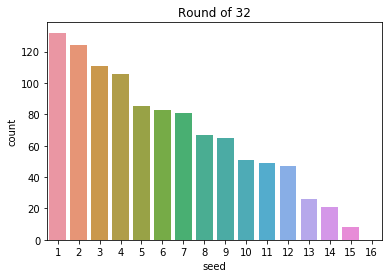

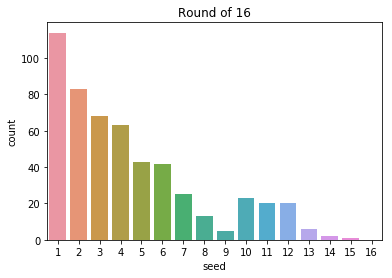

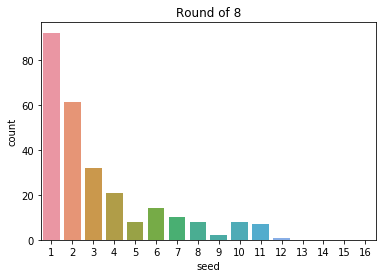

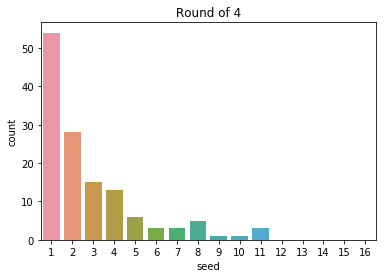

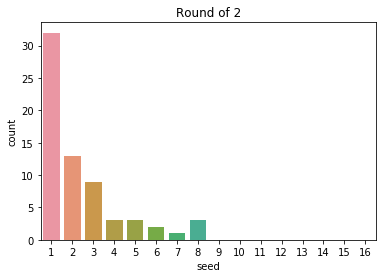

In [3]:
print('Seeds by round')

df2=df[df['round_of']!=64].sort_values('round_of',ascending=False)
for rnd, group in df2.groupby('round_of',sort=False):
    plt.figure()
    fig=seaborn.countplot(group.seed,order=range(1,17))
    fig.set(title='Round of {}'.format(rnd))

### Highest sum of seeds for each round

In [4]:
print('Highest sum of seeds by round')
grp=df.groupby(['round_of','year'])[['seed']].sum().add_suffix('_sum').reset_index()
grp=grp[grp['round_of']!=64].sort_values('round_of',ascending=False)
for rnd,group in grp.groupby('round_of',sort=False):
    idx=group['seed_sum'].idxmax
    print('Round of {}: ({}) {}'.format(rnd,group['year'].loc[idx],group['seed_sum'].loc[idx]))

Highest sum of seeds by round
Round of 32: (2016) 215
Round of 16: (1986) 89
Round of 8: (1990) 40
Round of 4: (2011) 26
Round of 2: (2014) 15


### Tournament history for a team

Duke finishes by year


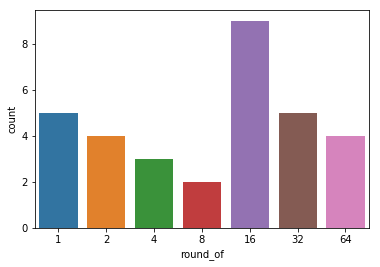

,opponent,round_of,seed,opponent_seed,score,opponent_score
year,,,,,,
2017,South Carolina,32,2,7,81,88
2016,Oregon,16,4,1,68,82
2015,Wisconsin,1,1,1,68,63
2014,Mercer,64,3,14,71,78
2013,Louisville,8,2,1,63,85
2012,Lehigh,64,2,15,70,75
2011,Arizona,16,1,5,77,93
2010,Butler,1,1,5,61,59
2009,Villanova,16,2,3,54,77


In [5]:
team='Duke'
print('{} finishes by year'.format(team))

df2=df[(df['team']==team)].sort_values(['year','round_of'],ascending=[0,1]).groupby('year',sort=False).first()
df2.loc[df2['win']==True,'round_of']=1
plt.figure()
fig=seaborn.countplot(df2.round_of,order=[1,2,4,8,16,32,64])
plt.show()
display(df2[['opponent','round_of','seed','opponent_seed','score','opponent_score']])

### Highest seeds by round

In [6]:
df2=df[(df['round_of'].isin([2,4,8,16]))]
grp=df2.groupby('round_of')
for rnd,group in grp:
    print('Round of {}'.format(rnd))
    res=group[group['seed']==group['seed'].max()][['year','team','seed','opponent','opponent_seed']].set_index('year').sort_index(ascending=False)
    display(res)

Round of 2


,team,seed,opponent,opponent_seed
year,,,,
2014,Kentucky,8,Connecticut,7
2011,Butler,8,Connecticut,3
1985,Villanova,8,Georgetown,1


Round of 4


,team,seed,opponent,opponent_seed
year,,,,
2011,VCU,11,Butler,8
2006,George Mason,11,Florida,3
1986,LSU,11,Louisville,2


Round of 8


,team,seed,opponent,opponent_seed
year,,,,
2002,Missouri,12,Oklahoma,2


Round of 16


,team,seed,opponent,opponent_seed
year,,,,
2013,Florida Gulf Coast,15,Florida,3
